In [1]:
from chebGreen.greenlearning.utils import DataProcessor
from chebGreen.greenlearning.model import *
from chebGreen.backend import plt
from chebGreen.utils import runMatlabScript

# %env TF_MLC_LOGGING=1
# %env TF_CPP_MIN_LOG_LEVEL=2

In [2]:
example = 'laplace'
script = 'generate_example'

In [4]:
runMatlabScript(example, script)

### Example = laplace ###
Number of samples: 200
Length scale: 0.01
Nf: 250
Nu: 100
Noise: 10000%
Step = 1/200
Step = 2/200
Step = 3/200
Step = 4/200
Step = 5/200
Step = 6/200
Step = 7/200
Step = 8/200
Step = 9/200
Step = 10/200
Step = 11/200
Step = 12/200
Step = 13/200
Step = 14/200
Step = 15/200
Step = 16/200
Step = 17/200
Step = 18/200
Step = 19/200
Step = 20/200
Step = 21/200
Step = 22/200
Step = 23/200
Step = 24/200
Step = 25/200
Step = 26/200
Step = 27/200
Step = 28/200
Step = 29/200
Step = 30/200
Step = 31/200
Step = 32/200
Step = 33/200
Step = 34/200
Step = 35/200
Step = 36/200
Step = 37/200
Step = 38/200
Step = 39/200
Step = 40/200
Step = 41/200
Step = 42/200
Step = 43/200
Step = 44/200
Step = 45/200
Step = 46/200
Step = 47/200
Step = 48/200
Step = 49/200
Step = 50/200
Step = 51/200
Step = 52/200
Step = 53/200
Step = 54/200
Step = 55/200
Step = 56/200
Step = 57/200
Step = 58/200
Step = 59/200
Step = 60/200
Step = 61/200
Step = 62/200
Step = 63/200
Step = 64/200
Step = 65/200
S

In [5]:
data = DataProcessor("datasets/laplace/data.mat")
data.generateDataset(trainRatio = 0.95)

In [11]:
model = GreenNN()
model.build()

In [12]:
%%time
lossHistory = model.train(data, epochs = {'adam':int(5000), 'lbfgs':int(0)})

Training with Adam:
Loss at epoch 100: Training = 1.920E-03, Validation = 6.060E-03
Loss at epoch 200: Training = 7.341E-04, Validation = 2.408E-03
Loss at epoch 300: Training = 6.147E-04, Validation = 1.479E-03
Loss at epoch 400: Training = 7.107E-04, Validation = 1.146E-03
Loss at epoch 500: Training = 2.960E-04, Validation = 6.688E-04
Loss at epoch 600: Training = 2.333E-04, Validation = 4.630E-04
Loss at epoch 700: Training = 1.934E-04, Validation = 3.556E-04
Loss at epoch 800: Training = 1.692E-04, Validation = 2.955E-04
Loss at epoch 900: Training = 1.479E-04, Validation = 2.499E-04
Loss at epoch 1000: Training = 1.313E-04, Validation = 2.183E-04
Loss at epoch 1100: Training = 1.191E-04, Validation = 1.950E-04
Loss at epoch 1200: Training = 5.492E-04, Validation = 7.425E-04
Loss at epoch 1300: Training = 1.025E-04, Validation = 1.668E-04
Loss at epoch 1400: Training = 9.544E-05, Validation = 1.533E-04
Loss at epoch 1500: Training = 8.953E-05, Validation = 1.427E-04
Loss at epoch 

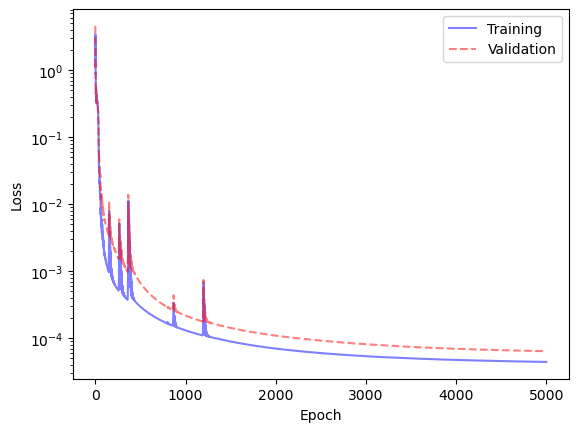

In [13]:
plt.figure()
plt.semilogy(range(len(lossHistory['training'])), lossHistory['training'], 'b', alpha = 0.5)
plt.semilogy(range(len(lossHistory['validation'])), lossHistory['validation'], 'r--', alpha = 0.5)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training','Validation'])

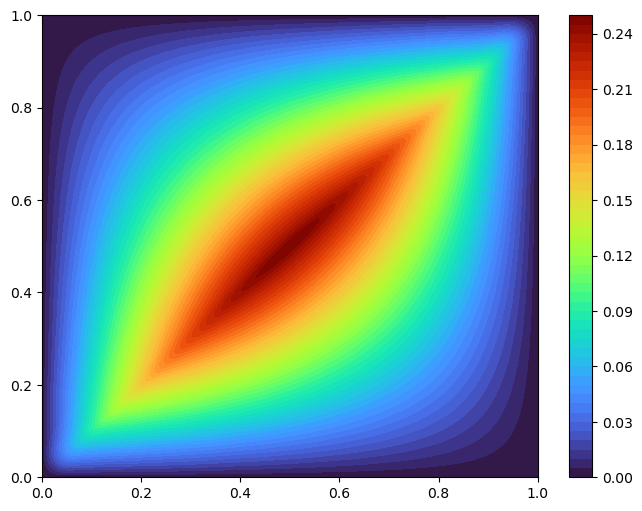

In [14]:
xF, xU = data.xF, data.xU
x, y = np.meshgrid(xU, xF)
G = model.evaluateG(x,y)

fig = plt.figure(figsize = (8,6))
plt.contourf(x,y,G, 50, cmap = 'turbo', vmin = np.min(G), vmax = np.max(G))
plt.colorbar()

In [15]:
model.saveModels('savedModels/laplace')